#### Information About the Data

u.data -- The full u data set, 100000 ratings by 943 users on 1682 items.
Each user has rated at least 20 movies. Users and items are
numbered consecutively from 1. The data is randomly
ordered. This is a tab separated list of
user id | item id | rating | timestamp.
The time stamps are unix seconds since 1/1/1970 UTC

u.info -- The number of users, items, and ratings in the u data set.

u.item -- Information about the items (movies); this is a tab separated
list of
movie id | movie title | release date | video release date |
IMDb URL | unknown | Action | Adventure | Animation |
Children's | Comedy | Crime | Documentary | Drama | Fantasy |
Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |
Thriller | War | Western |
The last 19 fields are the genres, a 1 indicates the movie
is of that genre, a 0 indicates it is not; movies can be in
several genres at once.
The movie ids are the ones used in the u.data data set.

u.genre -- A list of the genres.

u.user -- Demographic information about the users; this is a tab
separated list of
user id | age | gender | occupation | zip code
The user ids are the ones used in the u.data data set.

u.occupation -- A list of the occupations.

u1.base -- The data sets u1.base and u1.test through u5.base and u5.test
u1.test are 80%/20% splits of the u data into training and test data.
u2.base Each of u1, …, u5 have disjoint test sets; this if for
u2.test 5 fold cross validation (where you repeat your experiment
u3.base with each training and test set and average the results).
u3.test These data sets can be generated from u.data by mku.sh.
u4.base
u4.test
u5.base
u5.test

ua.base -- The data sets ua.base, ua.test, ub.base, and ub.test
ua.test split the u data into a training set and a test set with
ub.base exactly 10 ratings per user in the test set. The sets
ub.test ua.test and ub.test are disjoint. These data sets can
be generated from u.data by mku.sh.

allbut.pl -- The script that generates training and test sets where
all but n of a users ratings are in the training data.

mku.sh -- A shell script to generate all the u data sets from u.data.

In [1]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# info about the dataset
info_path = "data/u.info"
pd.read_csv(info_path, sep=' ', names=['Number','Info'])

,Number,Info
0,943,users
1,1682,items
2,100000,ratings


In [3]:
# load ratings data
data_path = "data/u.data" #  This is a tab separated list of user id | item id | rating | timestamp. The time stamps are unix seconds since 1/1/1970 UTC.
columns_name=['user_id','item_id','rating','timestamp']

data=pd.read_csv(data_path,sep="\t",names=columns_name)

print(data.head())
print(data.shape)

   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596
(100000, 4)


In [4]:
# load the movies
movie_path = "data/u.item"

columns = "item_id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children's | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western"
list_cols = columns.split(" | ")

movies = pd.read_csv(movie_path, sep="\|", names=list_cols)
movies

,item_id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# load the users
users_path = "data/u.user"

columns = "user_id | age | gender | occupation | zip code"
list_cols = columns.split(" | ")

users = pd.read_csv(users_path, sep="\|", names=list_cols)
users

,user_id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [6]:
data = pd.merge(data,movies,on="item_id")

In [7]:
data

,user_id,item_id,rating,timestamp,movie title,release date,video release date,IMDb URL,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,875747190,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,883888671,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,879138235,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,876503793,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962),01-Jan-1962,NaN,http://us.imdb.com/M/title-exact?Mamma%20Roma%...,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,655,1640,3,888474646,"Eighth Day, The (1996)",01-Nov-1996,NaN,"http://us.imdb.com/Title?Huiti%E8me+jour,+Le+(...",0,0,...,0,0,0,0,0,0,0,0,0,0
99997,655,1637,3,888984255,Girls Town (1996),23-Aug-1996,NaN,http://us.imdb.com/M/title-exact?Girls%20Town%...,0,0,...,0,0,0,0,0,0,0,0,0,0
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1...",02-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Saimt%20el%20...,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data = pd.merge(data,users, on="user_id")
data

,user_id,item_id,rating,timestamp,movie title,release date,video release date,IMDb URL,unknown,Action,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip code
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,49,M,writer,55105
1,196,257,2,881251577,Men in Black (1997),04-Jul-1997,NaN,http://us.imdb.com/M/title-exact?Men+in+Black+...,0,1,...,0,0,1,0,0,0,49,M,writer,55105
2,196,111,4,881251793,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Truth%20About...,0,0,...,0,1,0,0,0,0,49,M,writer,55105
3,196,25,4,881251955,"Birdcage, The (1996)",08-Mar-1996,NaN,"http://us.imdb.com/M/title-exact?Birdcage,%20T...",0,0,...,0,0,0,0,0,0,49,M,writer,55105
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Adventures%20...,0,0,...,0,0,0,0,0,0,49,M,writer,55105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,873,313,5,891392177,Titanic (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-12...,0,1,...,0,1,0,0,0,0,48,F,administrator,33763
99996,873,326,4,891392656,G.I. Jane (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?G%2EI%2E+Jane...,0,1,...,0,0,0,0,1,0,48,F,administrator,33763
99997,873,348,3,891392577,Desperate Measures (1998),30-Jan-1998,NaN,http://us.imdb.com/Title?Desperate+Measures+(1...,0,0,...,0,0,0,1,0,0,48,F,administrator,33763
99998,873,358,2,891392698,Spawn (1997),01-Aug-1997,NaN,http://us.imdb.com/M/title-exact?Spawn+(1997/I),0,1,...,0,0,1,1,0,0,48,F,administrator,33763


In [9]:
np.sort(data["rating"].unique())

array([1, 2, 3, 4, 5], dtype=int64)

In [10]:
data = data.drop(["video release date","IMDb URL"], axis=1)
data

,user_id,item_id,rating,timestamp,movie title,release date,unknown,Action,Adventure,Animation,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip code
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,49,M,writer,55105
1,196,257,2,881251577,Men in Black (1997),04-Jul-1997,0,1,1,0,...,0,0,1,0,0,0,49,M,writer,55105
2,196,111,4,881251793,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,0,0,0,0,...,0,1,0,0,0,0,49,M,writer,55105
3,196,25,4,881251955,"Birdcage, The (1996)",08-Mar-1996,0,0,0,0,...,0,0,0,0,0,0,49,M,writer,55105
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,0,0,0,0,...,0,0,0,0,0,0,49,M,writer,55105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,873,313,5,891392177,Titanic (1997),01-Jan-1997,0,1,0,0,...,0,1,0,0,0,0,48,F,administrator,33763
99996,873,326,4,891392656,G.I. Jane (1997),01-Jan-1997,0,1,0,0,...,0,0,0,0,1,0,48,F,administrator,33763
99997,873,348,3,891392577,Desperate Measures (1998),30-Jan-1998,0,0,0,0,...,0,0,0,1,0,0,48,F,administrator,33763
99998,873,358,2,891392698,Spawn (1997),01-Aug-1997,0,1,1,0,...,0,0,1,1,0,0,48,F,administrator,33763


In [11]:
data.isna().sum()

user_id         0
item_id         0
rating          0
timestamp       0
movie title     0
release date    9
unknown         0
Action          0
Adventure       0
Animation       0
Children's      0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
age             0
gender          0
occupation      0
zip code        0
dtype: int64

In [12]:
data[data.isnull().any(axis=1)]

,user_id,item_id,rating,timestamp,movie title,release date,unknown,Action,Adventure,Animation,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip code
1711,1,267,4,875692955,unknown,NaN,1,0,0,0,...,0,0,0,0,0,0,24,M,technician,85711
4776,532,267,3,875441348,unknown,NaN,1,0,0,0,...,0,0,0,0,0,0,20,M,student,92705
17957,319,267,4,875707690,unknown,NaN,1,0,0,0,...,0,0,0,0,0,0,38,M,programmer,22030
20011,268,267,3,875742077,unknown,NaN,1,0,0,0,...,0,0,0,0,0,0,24,M,engineer,19422
21645,297,267,3,875409139,unknown,NaN,1,0,0,0,...,0,0,0,0,0,0,29,F,educator,98103
32870,833,267,1,875655669,unknown,NaN,1,0,0,0,...,0,0,0,0,0,0,34,M,writer,90019
34295,422,267,4,875655986,unknown,NaN,1,0,0,0,...,0,0,0,0,0,0,26,M,entertainment,94533
42528,5,267,4,875635064,unknown,NaN,1,0,0,0,...,0,0,0,0,0,0,33,F,other,15213
53849,130,267,5,875801239,unknown,NaN,1,0,0,0,...,0,0,0,0,0,0,20,M,none,60115


In [13]:
data = data.dropna()
data

,user_id,item_id,rating,timestamp,movie title,release date,unknown,Action,Adventure,Animation,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip code
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,49,M,writer,55105
1,196,257,2,881251577,Men in Black (1997),04-Jul-1997,0,1,1,0,...,0,0,1,0,0,0,49,M,writer,55105
2,196,111,4,881251793,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,0,0,0,0,...,0,1,0,0,0,0,49,M,writer,55105
3,196,25,4,881251955,"Birdcage, The (1996)",08-Mar-1996,0,0,0,0,...,0,0,0,0,0,0,49,M,writer,55105
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,0,0,0,0,...,0,0,0,0,0,0,49,M,writer,55105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,873,313,5,891392177,Titanic (1997),01-Jan-1997,0,1,0,0,...,0,1,0,0,0,0,48,F,administrator,33763
99996,873,326,4,891392656,G.I. Jane (1997),01-Jan-1997,0,1,0,0,...,0,0,0,0,1,0,48,F,administrator,33763
99997,873,348,3,891392577,Desperate Measures (1998),30-Jan-1998,0,0,0,0,...,0,0,0,1,0,0,48,F,administrator,33763
99998,873,358,2,891392698,Spawn (1997),01-Aug-1997,0,1,1,0,...,0,0,1,1,0,0,48,F,administrator,33763


In [14]:
data.groupby("movie title").count()['rating'].sort_values(ascending=False)

movie title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1663, dtype: int64

In [15]:
ratings = pd.DataFrame(data.groupby("movie title").mean()['rating'])
ratings['number of ratings'] = pd.DataFrame(data.groupby("movie title").count()['rating'])
ratings

,rating,number of ratings
movie title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns (1988),3.207921,101
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41


<function matplotlib.pyplot.show(*args, **kw)>

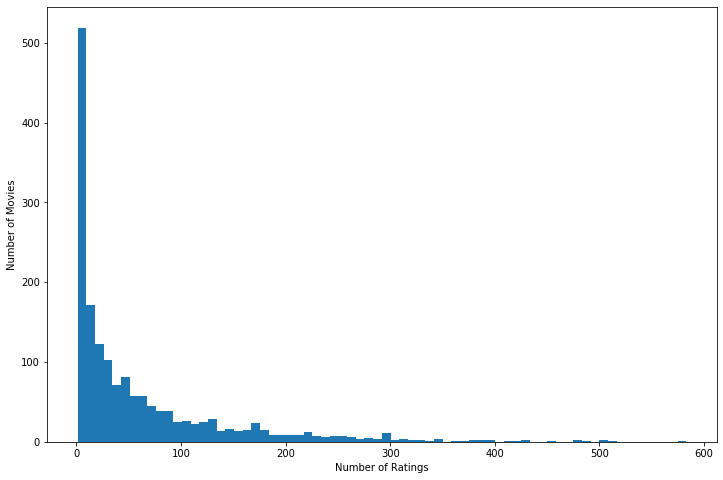

In [16]:
plt.figure(figsize=(12,8))
plt.axes(xlabel = "Number of Ratings", ylabel= "Number of Movies")
plt.hist(ratings['number of ratings'], bins=70)

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

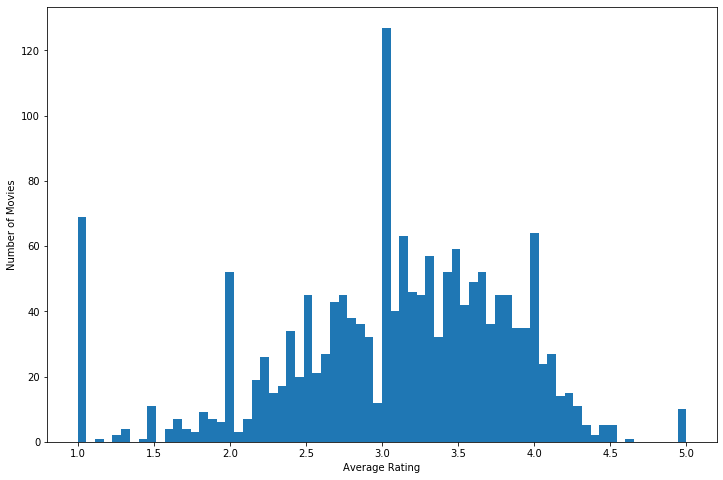

In [17]:
plt.figure(figsize=(12,8))
plt.axes(xlabel = "Average Rating", ylabel= "Number of Movies")
plt.hist(ratings['rating'], bins=70)

plt.show

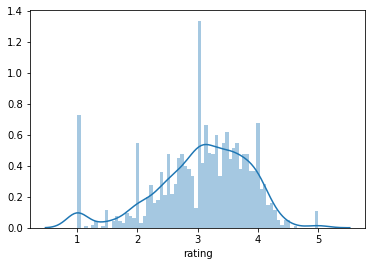

In [18]:
sns.distplot(ratings['rating'], hist=True, kde=True, 
             bins=70)


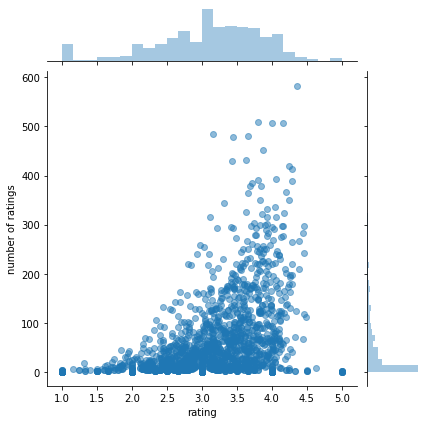

In [19]:
sns.jointplot(x='rating',y='number of ratings',data=ratings,alpha=0.5)

In [20]:
moviematrix = data.pivot_table(index="user_id", columns="movie title", values="rating")
moviematrix

movie title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
starwars_user_ratings = moviematrix["Star Wars (1977)"]
starwars_user_ratings

user_id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

In [22]:
sim_to_starwars = moviematrix.corrwith(starwars_user_ratings)
sim_to_starwars.sort_values(ascending=False)

movie title
Stripes (1981)                             1.0
Man of the Year (1995)                     1.0
Hollow Reed (1996)                         1.0
Line King: Al Hirschfeld, The (1996)       1.0
Good Man in Africa, A (1994)               1.0
                                          ... 
Wonderland (1997)                          NaN
Wooden Man's Bride, The (Wu Kui) (1994)    NaN
Yankee Zulu (1994)                         NaN
You So Crazy (1994)                        NaN
Á köldum klaka (Cold Fever) (1994)         NaN
Length: 1663, dtype: float64

In [23]:
corr_to_starwars = pd.DataFrame(sim_to_starwars, columns=['Correlation'])
corr_to_starwars.sort_values(by=['Correlation'])

,Correlation
movie title,
Theodore Rex (1995),-1.0
Frankie Starlight (1995),-1.0
Two Deaths (1995),-1.0
Swept from the Sea (1997),-1.0
Crossfire (1947),-1.0
...,...
Wonderland (1997),NaN
"Wooden Man's Bride, The (Wu Kui) (1994)",NaN
Yankee Zulu (1994),NaN


In [24]:
#drop NaN values
corr_to_starwars.dropna(inplace=True)
corr_to_starwars.sort_values(by='Correlation',ascending=False)

,Correlation
movie title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Ed's Next Move (1996),1.0
Hurricane Streets (1998),1.0
...,...
Frankie Starlight (1995),-1.0
Crossfire (1947),-1.0
Two Deaths (1995),-1.0


In [25]:
corr_to_starwars = corr_to_starwars.join(ratings['number of ratings'])
corr_to_starwars

,Correlation,number of ratings
movie title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Frankenstein (1974),0.192589,200
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44


In [26]:
corr_to_starwars[corr_to_starwars['number of ratings']>100].sort_values(by='Correlation', ascending=False)

,Correlation,number of ratings
movie title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [27]:
def MovieRecommendations(movie):
    user_ratings = moviematrix[movie]
    sim_to_movie = moviematrix.corrwith(user_ratings)
    corr_to_movie = pd.DataFrame(sim_to_movie, columns=['Correlation'])
    corr_to_movie.dropna(inplace=True)
    corr_to_movie = corr_to_movie.join(ratings['number of ratings'])
    return corr_to_movie[corr_to_movie['number of ratings']>100].sort_values(by='Correlation', ascending=False)[1:11]

In [28]:
MovieRecommendations("Monty Python's Life of Brian (1979)")

,Correlation,number of ratings
movie title,,
Crash (1996),0.651013,128
"Hudsucker Proxy, The (1994)",0.568845,110
Monty Python and the Holy Grail (1974),0.539618,316
Welcome to the Dollhouse (1995),0.451630,112
"Philadelphia Story, The (1940)",0.451328,104
Pink Floyd - The Wall (1982),0.434985,114
"Sex, Lies, and Videotape (1989)",0.420511,101
Chinatown (1974),0.395227,147
Carrie (1976),0.393162,121


In [29]:
data['release date'] = pd.to_datetime(data['release date'])
data[data['release date'] == data['release date'].min()]["movie title"].unique()

array(['Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)'],
      dtype=object)